<a href="https://colab.research.google.com/github/nes9zt/skills-introduction-to-github/blob/main/Yahoo_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finance API Tutorial - Using Authentication Keys

## What is an Authentication Key?
An Authentication Key (API Key) is a unique identifier used to authenticate requests made to an API. It ensures that only authorized users can access the service and prevents abuse.

### Why Do We Need an API Key?
1. **Security:** Ensures only authorized users can access the API.
2. **Tracking:** Helps API providers monitor usage.
3. **Rate Limits:** Prevents excessive requests from a single user.


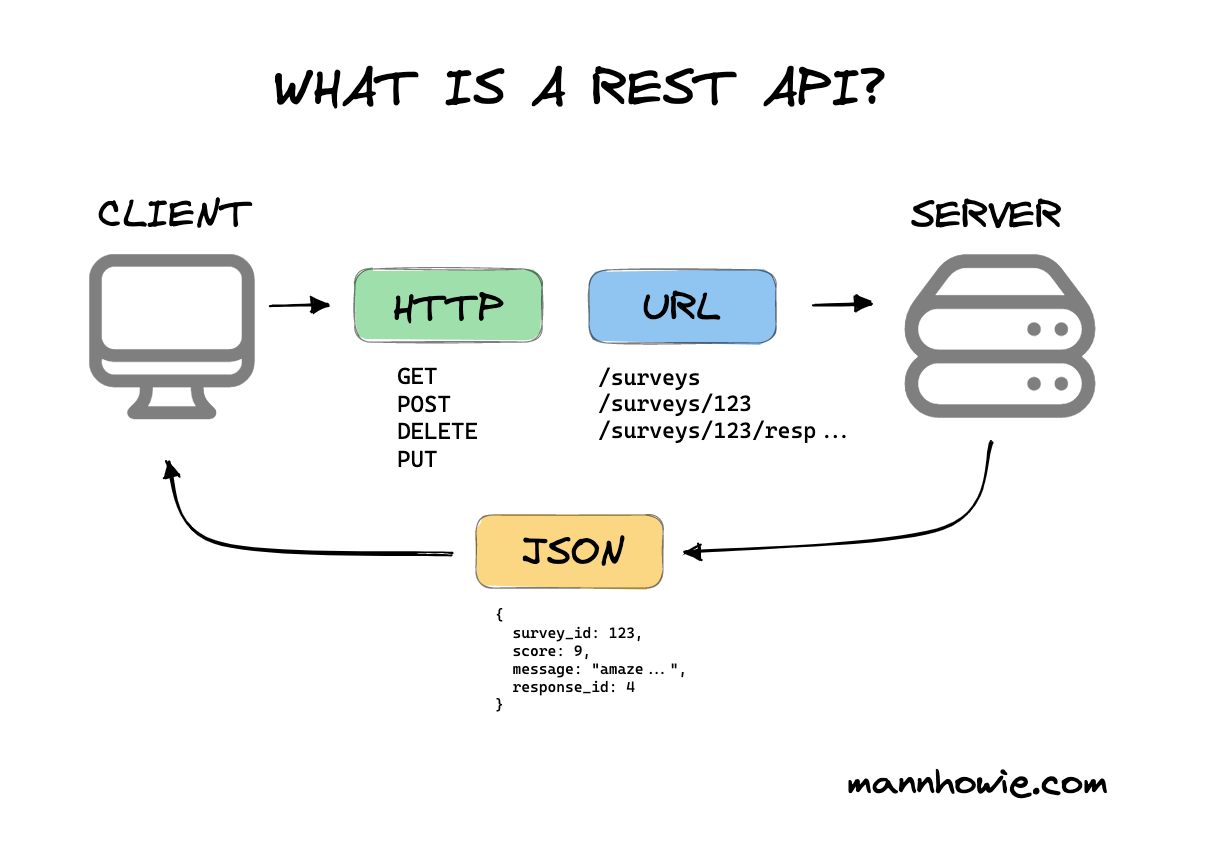

### How to Sign Up for an API Key on FinanceAPI.net
To use FinanceAPI.net, you'll need an API key, which is a unique identifier that allows you to authenticate and access the API services. Here’s how you can get one:

#### **Step 1: Visit the FinanceAPI.net Website**
Go to [FinanceAPI.net](https://financeapi.net) and look for the **Sign Up** or **Get API Key** section.

#### **Step 2: Create an Account**
- Click **Sign Up** or **Register**.
- Provide the required information (e.g., email, password, and any other required details).
- Confirm your email if an activation link is sent to you.

#### **Step 3: Log Into Your Account**
- After verifying your email, log into your FinanceAPI.net account.

#### **Step 4: Generate an API Key**
- Navigate to the **API Keys** or **Developer Dashboard** section.
- Click **Generate API Key** or **Request API Key**.
- Your API key will be displayed. Copy and store it securely.

#### **Step 5: Review API Documentation**
- Check the API documentation on FinanceAPI.net to understand request limits, endpoints, and authentication requirements.

#### **Step 6: Use the API Key in Requests**
Once you have your API key, you must include it in your API requests. Typically, you’ll pass it in the headers like this:

```python
headers = {
    'x-api-key': apikey
    }
```

Next, we will implement a Python class to interact with the API.

In [ ]:
import json
import pandas as pd
import json
import requests

In [ ]:
#get stock from the user
stock=input()

In [ ]:
apikey="dsiqDO2TMD66bvBoS3XCJ2JiVdzZqHGTaumQUkWp"

url = "https://yfapi.net/v6/finance/quote"

querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

In [ ]:
#that's pretty ugly. we can do this
print(json.dumps(response.json(), indent=4))

**Or we can put it in a Datafame**

In [ ]:
df = pd.DataFrame(response.json()['quoteResponse']['result'])
df.head()


To call multiple stocks in one API request, simply modify the querystring by **comma-separating stock symbols. **Here's how:

In [ ]:
stocks = "AAPL,GOOGL,MSFT"  # Add more stocks separated by commas
querystring = {"symbols": stocks}

response = requests.get(url, headers=headers, params=querystring)

# Convert response to DataFrame
df = pd.DataFrame(response.json()['quoteResponse']['result'])
df.head()


What if I *just* want Market Cap and express that in something I can read (like dollars)

In [ ]:
# Extract Market Cap and format it with commas
df['marketCap'] = df['marketCap'].apply(lambda x: f"${x:,.2f}" if pd.notna(x) else "N/A")

# Display the results
print(df[['symbol', 'marketCap']])

**Format Market Cap** in dollars using f"${x:,.2f}", which adds commas and two decimal places.

### Available API Endpoints
The Yahoo Finance API offers several key endpoints:

1. **Market Summary** - Provides an overview of major indices and market performance.
2. **Market Movers** - Lists top gainers, losers, and most active stocks.
3. **Stock Quotes** - Retrieves stock price, volume, and other market data.
4. **Historical Data** - Fetches past stock performance data.
5. **Company Information** - Accesses company profiles and financial statements.
6. **SEC Filings** - Retrieves the latest SEC filings for a given company.
7. **Market News** - Provides the latest financial news related to specific stocks or markets.

These endpoints offer comprehensive financial data, making them valuable for market analysis and decision-making.



In the **Quote Summary Endpoint**, a ***module*** is a specific section of financial data related to a stock. These modules allow you to customize the API request to fetch only the relevant financial information instead of retrieving everything at once.

**How Does a Module Work?**

When making a request to the Quote Summary Endpoint, you specify a module (or multiple modules) in the query. Each module corresponds to a different category of financial data.


*Some commonly used modules include:*

**financialData** – Includes valuation, revenue, and profitability details.
price – Provides pricing information like open, close, and current price.

**summaryDetail** – Returns general details like dividend yield, volume, and average daily volume.

**defaultKeyStatistics** – Contains market cap, shares outstanding, and P/E ratio.
earnings – Provides earnings per share (EPS) and earnings history.

**balanceSheetHistory** – Retrieves balance sheet data.

**How to Use a Module in an API Request**

In [ ]:
import requests
import json

url = "https://yfapi.net/v11/finance/quoteSummary/AAPL"

querystring = {
    "symbol": "AAPL",  #don't need this here?
    "modules": "price"
}

headers = {
    'x-api-key': apikey
}
#headers = {'Authorization': f'Bearer {apikey}'}


#response = requests.get(url, headers=headers, params=querystring)
response = requests.request("GET", url, headers=headers, params=querystring)

# Pretty print the JSON response
print(json.dumps(response.json(), indent=4))


In [6]:
#Prompt the user to input two or more stock symbols.

import json
import pandas as pd
import json
import requests

apikey="dsiqDO2TMD66bvBoS3XCJ2JiVdzZqHGTaumQUkWp"
url = "https://yfapi.net/v6/finance/quote"

stock1= input("Input stock symbol:")
stock2= input("Input stock symbol:")
#Use the API to fetch data for the given symbols.

querystring = {"symbols":stock1}

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

#Extract and display only the Stock Ticker, Company Name, and Current Market Price.


Input stock symbol:AAPL
Input stock symbol:MSFT
{"quoteResponse":{"result":[{"language":"en-US","region":"US","quoteType":"EQUITY","typeDisp":"Equity","quoteSourceName":"Nasdaq Real Time Price","triggerable":true,"customPriceAlertConfidence":"HIGH","currency":"USD","corporateActions":[],"postMarketTime":1740433237,"regularMarketTime":1740430801,"exchange":"NMS","messageBoardId":"finmb_24937","exchangeTimezoneName":"America/New_York","exchangeTimezoneShortName":"EST","gmtOffSetMilliseconds":-18000000,"market":"us_market","esgPopulated":false,"marketState":"POST","postMarketChangePercent":0.32375062,"postMarketPrice":247.9,"postMarketChange":0.7999878,"regularMarketChange":1.550003,"regularMarketDayHigh":248.86,"regularMarketDayRange":"244.59 - 248.86","regularMarketDayLow":244.59,"regularMarketVolume":49562083,"regularMarketPreviousClose":245.55,"bid":246.74,"ask":257.28,"bidSize":3,"askSize":1,"fullExchangeName":"NasdaqGS","financialCurrency":"USD","regularMarketOpen":244.808,"averageD